In [1]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "120"
import numpy as np


#### KNeighborsClassifier 
##### scikit-learn implements KNeighborsClassifier learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user.

In [2]:
data,target  = make_classification(n_samples=500, n_informative=1,
                                   n_features=30, n_clusters_per_class=1, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=12)

print(X_train.shape)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

y_pred = knn_clf.predict(X_test)
print("accuracy: {:.2f}".format(knn_clf.score(X_test, y_test)))


(375, 30)
accuracy: 0.80


In [3]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_train, y_train)
print("accuracy: {:.2f}".format(nc.score(X_test, y_test)))

accuracy: 0.94


In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
print("Input features:{0}".format(X.shape))
print("Target :{0}".format(y.shape))

Input features:(50, 2)
Target :(50,)


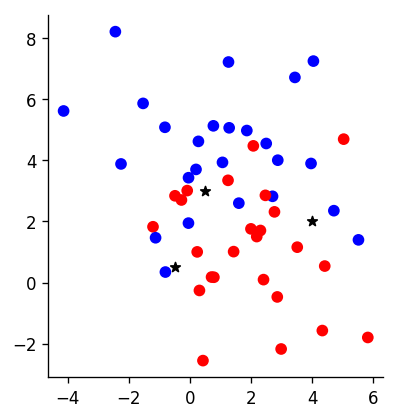

In [5]:
X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])

plt.figure(figsize=(5,4))
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker="*")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

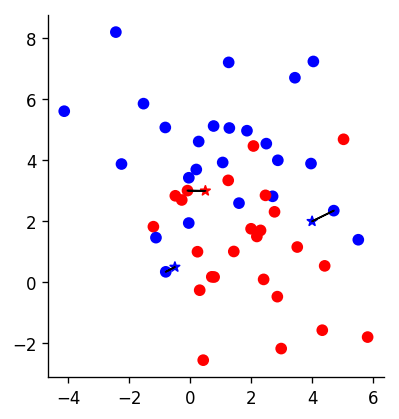

In [6]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

def plot_n_neighbors(X, y, n_neighbors=1):
    X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure()
    plt.gca().set_aspect("equal")
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                    X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), marker="*")
    training_points = plt.scatter(X[:, 0], X[:, 1], c=y) 
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)


plot_n_neighbors(X, y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=12)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.79


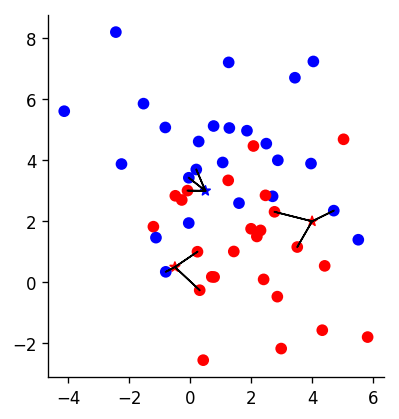

In [8]:
plot_n_neighbors(X, y,3)
plt.show()

In [9]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):                                       
    # multiclass                                                                                                                 
    if eps is None:                                                                                                              
      eps = X.std() / 2.                                                                                                       

    if ax is None:                                                                                                               
      ax = plt.gca()                                                                                                           

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         

    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                                                                       
    decision_values = classifier.predict(X_grid)                                                                                 
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=alpha)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)                                                                                                    
    ax.set_xticks(())                                                                                                            
    ax.set_yticks(())  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

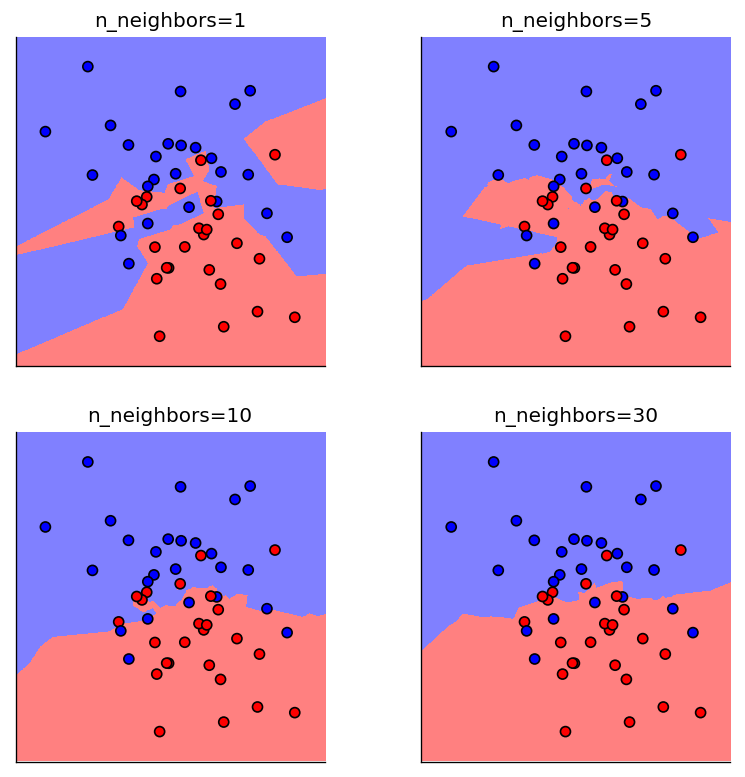

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, n_neighbors in zip(axes.ravel(), [1, 5, 10, 30]):
    ax.set_title("n_neighbors={}".format(n_neighbors))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")
plt.show()

##### As observed  the decision boundary changes as n_neighbors change. Hence to measure the impact  of n_neighbors we will plot the training scores and  test scores of different models  for a range of n_neighbors .This defines model complexity

In [11]:
training_scores =[]
test_scores = []

neighbors =range(1,30,2)
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=13)

for n_neighbors in neighbors:
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    training_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

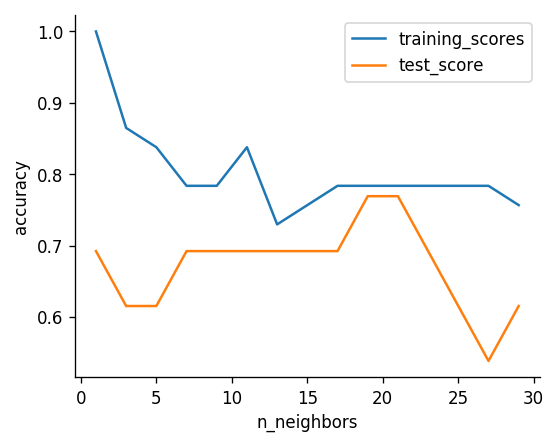

In [12]:
plt.figure(figsize=(5,4))
 
plt.plot(neighbors,training_scores,label="training_scores")
plt.plot(neighbors,test_scores,label= "test_score")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()